# Nicht-lineare Optimierung - Vorlesung

**Themenüberblick:** 

- höhere partielle Ableitungen: Symmetrie, Hessematrix
- Taylorreihe
- nicht-lineare Optimierung ohne Nebenbedingungen: Optimalitätskriterien über Eigenwerte 
- nicht-lineare Optimierung mit Nebenbedingungen: Lagrange-Multiplikatoren

**zusätzliche Unterlagen:** 

- `10_Rechnen_mit_Differentialen_Taylorreihe-scan.pdf`
- `11_Nicht-lineare_Optimierung-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Höhere partielle Ableitungen

Die erste partielle Ableitung einer Funktion $f(x_1, \ldots, x_n)$ nach der Inputvariablen $x_k$ liefert die Funktion $\frac{\partial f}{\partial x_k}(x_1, \ldots, x_n)$, kurz $\frac{\partial f}{\partial x_k}$. Diese kann wiederum partiell abgeleitet werden, z. B. nach der Inputvariablen $x_l$. Das liefert die Funktion $\frac{\partial^2 f}{\partial x_l\partial x_k}(x_1, \ldots, x_n)$, kurz $\frac{\partial^2 f}{\partial x_l\partial x_k}$, eine partielle Ableitung zweiter Ordnung. Die Funktion $f(x_1, \ldots, x_n)$ hat $n$ Inputvariablen und somit $n^2$ partielle Ableitungen zweiter Ordnung. 

- Die zweifache Ableitung nach der selben Inputvariablen $x_k$ wird statt $\frac{\partial^2 f}{\partial x_k\partial x_k}$ meist $\frac{\partial^2 f}{\partial x_k^2}$ geschrieben.
- Partielle Ableitungen höherer als zweiter Ordnung werden analog durch wiederholtes partielles Ableiten berechnet.
- Es gilt für in der Praxis typische Funktionen (Details siehe [Satz von Schwarz](https://de.wikipedia.org/wiki/Satz_von_Schwarz)), dass 

  $$\frac{\partial^2 f}{\partial x_l\partial x_k} = \frac{\partial^2 f}{\partial x_k\partial x_l}.$$


**Hessematrix:**

Die $n^2$ partiellen Ableitungen zweiter Ordnung einer Funktion $f(x_1, \ldots, x_n)$ werden in der sogenannten Hessematrix $H(x_1, \ldots, x_n)$, kurz $H$, angeordnet:

$$H = \begin{pmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \ldots & \frac{\partial^2 f}{\partial x_1\partial x_n} \\
\vdots & \vdots & \vdots \\
\frac{\partial^2 f}{\partial x_n\partial x_1} & \ldots & \frac{\partial^2 f}{\partial x_n^2}
\end{pmatrix}$$

Die Hessematrix ist unter den Bedingungen des Satzes von Schwarz symmetrisch, d.h. $H^T=H$.

**Beispiel:** $z = f(x,y) = 3x^2y$

- $\frac{\partial f}{\partial x} = 6xy$, $\frac{\partial^2 f}{\partial x^2} = 6y$, $\frac{\partial^2 f}{\partial y\partial x} = 6x$
- $\frac{\partial f}{\partial y} = 3x^2$, $\frac{\partial^2 f}{\partial y^2} = 0$, $\frac{\partial^2 f}{\partial x\partial y} = 6x$
- $\text{grad}(f) = \nabla f = \begin{pmatrix} 6xy \\ 3x^2\end{pmatrix}$
- $H = \begin{pmatrix} 6y & 6x \\ 6x & 0\end{pmatrix}$

## Taylorreihe

**1-dimensionale Taylorreihe:**

Wir betrachten eine Funktion $y=f(x)$ mit nur einer Inputvariablen $x$. Der Funktionswert kann in der Umgebung einer frei gewählten Inputstelle $x_0$ mittels der sogenannten Taylorreihe(nentwicklung) durch ein Polynom $k$-ter Ordnung approximiert werden, sodass der Funktionswert und alle Ableitungen bis inkl. $k$-ter Ordnung bei $x_0$ übereinstimmen. 

- Beispiel: Taylorreihe dritter Ordnung, d. h. Polynom dritter Ordnung: 
  
  $$f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{1}{2}f''(x_0)(x - x_0)^2 + \frac{1}{6}f'''(x_0)(x - x_0)^3 + \text{Fehler}$$
  
- Die Taylorreihe 1. Ordnung ist die Gleichung der Tangente an den Graphen von $f$ bei $x_0$.
- Die Taylorreihe 2. Ordnung ist die Gleichung der approximierenden Parabel an den Graphen von $f$ bei $x_0$.
- unendliche Taylorreihe: 

  $$f(x) = \sum_{k=0}^\infty \frac{1}{k!}f^{(k)}(x_0)(x - x_0)^k.$$ 
  
  Dabei bezeichnet $f^{(k)}$ die $k$-te Ableitung von $f$.


*Beispiele:*

- Exponentialfunktion bei $x_0 = 0$: $e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \ldots = \sum_{k=0}^\infty \frac{x^k}{k!}$
- Sinus bei $x_0 = 0$: $\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \ldots$
- Cosinus bei $x_0 = 0$: $\cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \ldots$
- vgl. $e^{i\varphi} = \cos(\varphi) + i\sin(\varphi)$
- siehe [Unterlagen zumReihungstest](https://energie.labs.fhv.at/~kr/rt/)
- siehe [Wikipedia](https://de.wikipedia.org/wiki/Taylorreihe#Wichtige_Taylorreihen)

**n-dimensionale Taylorreihe:**

Wir betrachten eine Funktion $z=f(x,y)$ mit zwei Inputvariablen $x$ und $y$. 
Die Taylorreihe(nentwicklung) bei einer frei gewählten Inputstelle $(x_0,y_0)$ lautet in Verallgemeinerung des 1-dimensionalen Falls

$$\begin{align}
f(x,y) =& f(x_0,y_0) + 
( \frac{\partial f}{\partial x}(x_0,y_0), \frac{\partial f}{\partial y}(x_0,y_0) )
\begin{pmatrix} x - x_0 \\ y - y_0 \end{pmatrix} + \\ 
         & + \frac{1}{2} ( x - x_0 , y - y_0 ) \begin{pmatrix}
\frac{\partial^2 f}{\partial x^2}(x_0,y_0)          & \frac{\partial^2 f}{\partial x\partial y}(x_0,y_0) \\
\frac{\partial^2 f}{\partial y\partial x}(x_0,y_0)  & \frac{\partial^2 f}{\partial y^2}(x_0,y_0)
\end{pmatrix} \begin{pmatrix} x - x_0 \\ y - y_0 \end{pmatrix} + \text{Fehler}
\end{align}$$

Mit Hilfe der Schreibweisen für den Gradienten, die Hessematrix und die Differentiale von $x$ und $y$ können wir die Taylorreihe kürzer schreiben. Hier zwei Varianten:

$$\begin{align}
f(x,y)   &= f(x_0,y_0) + \text{grad}(f)^T (x_0,y_0) \begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} + \frac{1}{2} ( \text{d}x , \text{d}y )\, H(x_0,y_0)
\begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} + \text{Fehler} \\
\Delta z &= \nabla f^T \begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} + \frac{1}{2} ( \text{d}x , \text{d}y )\, H \begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} + \text{Fehler}
\end{align}$$

*Bild:*

- Die Taylorreihe 1. Ordnung ist die Gleichung der Tangentialebene an den Graphen von $f$ bei $(x_0, y_0)$.
- Die Taylorreihe 2. Ordnung ist die Gleichung des Tangentialparaboloids an den Graphen von $f$ bei $(x_0, y_0)$.

![taylorreihe.png](abbildungen/taylorreihe.png)

*Beispiel:* $z = f(x,y) = 3x^2y$ bei $(x_0,y_0)=(3,4)$

- $f(x_0,y_0)= 108$
- $\text{grad}(f)(x_0,y_0) = \begin{pmatrix} 72 \\ 27 \end{pmatrix}$
- $H(x_0,y_0)) = \begin{pmatrix} 24 & 18 \\ 18 & 0 \end{pmatrix}$
- $f(x,y) = 108 + (72, 27)\begin{pmatrix} x-3 \\ y-4 \end{pmatrix} + \frac{1}{2} ( x-3, y-4 ) \begin{pmatrix} 24 & 18 \\ 18 & 0 \end{pmatrix} \begin{pmatrix} x-3 \\ y-4 \end{pmatrix} + \text{Fehler}$

Die Verallgemeinerung der Taylorreihe auf eine $n$-dimensionale, skalare Funktion $y = f(x_1, x_2, \ldots, x_n)$ liegt auf der Hand.

## Nicht-lineare Optimierung ohne Nebenbedingungen

*Problemtyp:*  Min. oder Max. $f(x_1, x_2, \ldots, x_n)$

**Wiederholung des 1-dimensionalen Falls:**

Eine Funktion $y=f(x)$ von einer Variablen $x$ muss folgende Optimalitätskriterien erfüllen, um an einer Stelle $x_0$ ein lokales Optimum (Minumum oder Maximum) zu haben:

- Wenn $f'(x_0) = 0$ und $f''(x_0) > 0$, dann hat $f$ bei $x_0$ ein lokales Minimum.
- Wenn $f'(x_0) = 0$ und $f''(x_0) < 0$, dann hat $f$ bei $x_0$ ein lokales Maximum.


**Verallgemeinerung auf den $n$-dimensionalen Fall:**

Wir betrachten zunächst eine Funktion $z=f(x,y)$ von zwei Variablen $x$ und $y$. 
An die Stelle der ersten Ableitung $f'(x_0)$ tritt der Gradient $\nabla f(x_0,y_0)$. Die Bedingung $\nabla f(x_0, y_0)=0$ ist eine Vektorgleichung und bedeutet auf Komponentenebene, dass jede partielle Ableitung von $f$ bei $x_0$ Null ist.
An die Stelle der zweiten Ableitung $f''(x_0)$ tritt die Hessematrix $H(x_0,y_0)$. Die Bedingung der Positivität $H(x_0,y_0)>0$ bzw. der Negativität $H(x_0,y_0)<0$ ist aber keine komponentenweise Matrixungleichung! Vielmehr ist folgendes gemeint: 

- $H(x_0,y_0) > 0$ bedeutet, dass alle Eigenwerte von $H(x_0,y_0)$ größer Null sind. In diesem Fall heißt die Hessematrix positiv definit.
- $H(x_0,y_0) \geq 0$ bedeutet, dass alle Eigenwerte von $H(x_0,y_0)$ größer oder gleich Null sind. In diesem Fall heißt die Hessematrix positiv semidefinit.
- $H(x_0,y_0) \leq 0$ bedeutet, dass alle Eigenwerte von $H(x_0,y_0)$ kleiner oder gleich Null sind. In diesem Fall heißt die Hessematrix negativ semidefinit.
- $H(x_0,y_0) < 0$ bedeutet, dass alle Eigenwerte von $H(x_0,y_0)$ kleiner Null sind. In diesem Fall heißt die Hessematrix negativ definit.

Aus der Symmetrie einer Hessematrix, d. h. $H^T=H$, kann man beweisen, dass eine Hessematrix immer reelle Eigenwerte hat und dass Eigenvektoren zu unterschiedlichen Eigenwerten orthogonal sind. 

Mit diesen Vorbemerkungen lassen sich nun die Optimalitätskriterien für den zweidimensionalen Fall formulieren:

- *Notwendige Bedingung:* Falls die Funktion $f(x,y)$ bei $(x_0,y_0)$ ein lokales Minimum (Maximum) hat, dann ist $\nabla f(x_0,y_0)=0$ und $H(x_0,y_0)$ positiv semidefinit (negativ semidefinit).

- *Hinreichende Bedingung:* Falls $\nabla f(x_0,y_0)=0$ und $H(x_0,y_0)$ positiv definit (negativ definit) ist, dann hat $f$ bei $(x_0,y_0)$ ein lokales Minimum (Maximum).

Die Verallgemeinerung auf eine $n$-dimensionale, skalare Funktion $y = f(x_1, x_2, \ldots, x_n)$ führt auf die Bedingungen, dass der Gradient als Vektor im $\mathbb{R}^n$ Null ist und die $n\times n$ Hessematrix positiv (semi)definit bzw. negativ (semi)definit ist.
Eine Stelle, an der der Gradient von $f$ Null ist, heißt kritischer Punkt. An einem kritischen Punkt ist somit auch das Differential Null ($\text{d}f=0$), und die Tangential(hyper)ebene ist waagrecht.

Wir diskutieren zum Abschluss dieses Abschnitts noch im zweidimensionalen Rahmen, warum die Eigenwerte der Hessematrix entscheidend sind. Dazu betrachten wir die Taylorreihe zweiter Ordnung von $z=f(x,y)$: 

$$\Delta z = \nabla(f)^T \begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} + \frac{1}{2} ( \text{d}x , \text{d}y )\, H \begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} + \text{Fehler}$$

Bei einem kritischen Punkt ist $\nabla f=0$, und die Taylorreihe reduziert sich zu 

$$\Delta z = \frac{1}{2} ( \text{d}x , \text{d}y )\, H \begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} + \text{Fehler}.$$

Als nächstes schreiben wir den Vektor $\begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix}$ als Linearkombination der Eigenvektoren $e_1$ und $e_2$ von $H$: 
$\begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} = c_1 e_1 + c_2 e_2$
und setzen dies in die Taylorreihe ein:

$$\begin{align}
\Delta z &= \frac{1}{2} (c_1 e_1 + c_2 e_2)^T H (c_1 e_1 + c_2 e_2) + \text{Fehler} \\
         &= \frac{1}{2} (c_1 e_1^T + c_2 e_2^T) (c_1 \lambda_1 e_1 + c_2 \lambda_2 e_2) + \text{Fehler} \\
         &= \frac{1}{2} (\lambda_1 c_1^2 e_1^T e_1 + 0 + 0 + \lambda_2 c_2^2 e_2^T e_2) + \text{Fehler} \\
         &= \frac{1}{2} (\lambda_1 c_1^2 \lVert e_1 \rVert^2 + \lambda_2 c_2^2 \lVert e_2 \rVert^2) + \text{Fehler} \\
\end{align}$$

Wenn beide Eigenwerte $\lambda_1$ und $\lambda_2$ positiv sind, dann ist $\Delta z$ in der Nähe des kritischen Punktes positiv und nur beim kritischen Punkt selber Null. Diese Behauptung stimmt deshlab, weil der Fehler sicher kleiner als die quadratischen Ausdrücke wird, wenn man sich dem kritischen Punkt nähert. Dass $\Delta z$ in der Nähe des kritischen Punktes positiv ist, ist aber gleichbedeutend damit, dass der kritsche Punkt ein lokales Minimum ist.

## Nicht-lineare Optimierung mit Nebenbedingungen

*Problemtyp:*  Min. oder Max. $f(x_1, x_2, \ldots, x_n)$ unter der Nebenbedingung $g(x_1, x_2, \ldots, x_n) = 0$

Wir beginnen mit einem Beispiel, das wir zunächst als Extremwertsaufgabe wie in der Schule und anschließend mit der Methode der Lagrange-Multiplikatoren lösen. Der Vorteil der letzteren Methode ist, dass sie sich auf beliebige Dimensionen und mehrere Nebenbedingungen problemlos verallgemeinern läßt.

**Beispiel:** Man finde jenes Rechteck mit Umfang $u=12$, das maximalen Flächeninhalt hat, d. h. für $x$ und $y$ die Länge und die Breite des Rechtecks maximiere $f(x,y)=xy$ unter der Nebenbedingung $g(x,y) = 2x + 2y -12 =0$.

*erster Lösungsweg:* Die Nebenbedingung läßt sich nach einer Variablen auflösen, z. B. $y = 6 - x$, sodass die Zielfunktion nach dem Einsetzen nur noch von einer Variablen abhängt: $f(x, 6 - x) = x(6 - x) = 6x - x^2$. Man erhält ein 1-dimensionales Optimierungsproblem ohne Nebenbedingungen: Max. $6x - x^2$. Nullsetzen der ersten Ableitung liefert $6 - 2x =0$ und die Lösung $x^*=3,$ $y^*=6 - 3 = 3 = x^*$, also ein Quadrat. Die maximale Fläche ist $f(x^*, y^*)=9$. Die zweite Ableitung ist -2, also kleiner Null. Daher ist die Lösung ein lokales (und in diesem Fall auch globales) Maximum. 

*zweiter Lösungsweg: Methode der Lagrange-Multiplikatoren:*

Wir zeichnen die Konturlinien der Zielfunktion $f(x,y)=xy$, die Nebenbedingung $g(x,y) = 2x + 2y - 12 = 0$ und die Gradienten $\nabla f$ und $\nabla g$ an der optimalen Stelle $(3,3)$.

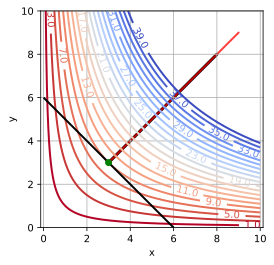

In [2]:
x = linspace(0, 10, 200)
y = linspace(0, 10, 200)
X, Y = meshgrid(x, y)
F = X*Y
G = 2*X + 2*Y - 12

# Konturplot:
figure(figsize(4,4))
cs = contour(X, Y, F, arange(1, 40, 2), linewidths=2, cmap='coolwarm_r')
clabel(cs, fontsize=10, fmt='%1.1f')
cs = contour(X, Y, G, 0, linewidths=2, colors='black')
plot(3,3, 'og')
arrow(3,3, 5,5, linewidth = 3, color='black')
arrow(3,3, 6,6, linewidth = 2, color='red', alpha=0.75)
xlabel('x')
ylabel('y')
axis('equal')
grid(True)

Der Gradient der Zielfunktion $f$ und der Gradient der Nebenbedingungsfunktion $g$ sind im Optimum kollinear, d. h. linear abhängig oder anders ausgedrückt ein Vielfaches von einander:

$$\nabla f = \lambda \nabla g$$

mit Vielfachem $\lambda$. Wenn wir diese Bedingung als Ausgangspunkt zur Berechnung der Lösung verwenden, dann lautet sie

$$\begin{pmatrix} y \\ x \end{pmatrix} = \lambda \begin{pmatrix} 2 \\ 2 \end{pmatrix}.$$

Daraus folgt $x= y$, was eingesetzt in die Nebenbedingung die selbe Lösung $x^*=3$, $y^*=3$ liefert.

**Methode der Lagrange-Multiplikatoren allgemein:**

Falls die Zielfunktion $f(x_1, x_2, \ldots, x_n)$ unter den Nebenbedingungen 

$$\begin{align}
g_1 (x_1, x_2, \ldots, x_n) &= 0 \\
g_2 (x_1, x_2, \ldots, x_n) &= 0 \\
\vdots                      &= \vdots \\
g_m (x_1, x_2, \ldots, x_n) &= 0
\end{align}$$

ein lokales Optimum bei $x^* =(x_1^*, x_2^*, \ldots, x_n^*)$ hat, dann gibt es Lagrange-Multiplikatoren $\lambda_1, \lambda_2, \ldots, \lambda_m,$ sodass gilt:

$$\nabla f(x^*) = \lambda_1 \nabla g_1(x^*) + \lambda_2 \nabla g_2(x^*) + \ldots + \lambda_m \nabla g_m (x^*).$$